# INTRODUÇÃO

Nesse estudo, nossa meta é mergulhar fundo nas relações que existem entre as caracteristicas fisicas de um imóvel, como metragem e número de cômodos, com seu preço e localização. A ideia é entender, principalmente, o que está por trás dos preços dos imóveis de São paulo, uma das metrópoles mais agitadas e desafiadoras do Brasil. Os dados aqui analisados foram baixados na plataforma do Kaggle, bastante popular por suas competições de machine learning, e foram originadas de uma raspagem no site do Quinto Andar, em março de 2023.

A análise aqui apresentada discute as variáveis citadas acima e explora o quanto, e como, eleas influenciam tanto no preço de aluguel quanto o preço total de um imóvel, com encargos adicionais(não especificados no Kaggle). Buscaremos entender, por exemplo, como a localização de um imóvel em determinado bairro pode impactar no seu preço de aluguel. Além disso, investigaremos a relevância de outras caracteristicas fisicas do imóvel, como o tamanho em metros quadrados, a quantidade de banheiros e quartos, entre outros, na determinação do seu valor total de venda ou aluguel. Também vamos identificar os bairros mais baratos e mais caros da cidade.

Este estudo foi feito apenas com o intuito de aprendizado, já que não sabemos se o dataset está enviesado de qualquer forma, com algum tipo de lacuna ou mesmo erros, já que não temos nenhum processo de validação.

Então seja bem-vindo à nossa jornada explóratoria pelo mercado imobiliario de São Paulo.

Link para o dataset: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices

Definição das colunas da tabela:
 - Endereço: O endereço do imóvel
 - Bairro: O bairro onde o imóvel está localizado
 - Área: Área do imóvel em metros quadrados
 - Quartos: O número de quartos no imóvel
 - Garagem: O número de vagas de estacionamento disponíveis no imóvel
 - Tipo: O tipo do imóvel(apartamento, casa, etc.) 
 - Aluguel: O aluguel mensal do imóvel
 - Total: O custo do imóvel, incluindo aluguel, impostos e outras taxas.

# IMPORTANDO BIBLIOTECAS

In [4]:
# Bibliotecas para tratar dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configurar para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Configurar o estilo de gráfico do ggplot
plt.style.use("ggplot")

# Configurar para exbir até 15 linhas de um dataframe do pandas
pd.set_option("display.max_rows", 15)

# Configurar para exibir todas as colunas de um dataframe do pandas
pd.set_option("display.max_columns", None)

# Configurar quebras de espaçamento automáticas com nb_black
# %load_ext nb_black

# IMPORTANDO O DATASET

In [5]:
aptos = pd.read_csv("data/data.csv")
aptos.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [6]:
print(f"O dataframe possui {aptos.shape[0]} linhas e {aptos.shape[1]} colunas.")

O dataframe possui 11657 linhas e 8 colunas.


In [7]:
aptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


Não temos campos nulos e temos uma amostra de tamanho razoável, tanto para criar boas inferências a respeti do padrão dos imóveis, quanto se quisermos, futuramente, criar modelos preditivos.

In [12]:
numerics = ["int16", "int32","int64", "float16", "float32", "float64"]

numericos = aptos.select_dtypes(include=numerics)

nao_numericos = aptos.select_dtypes(exclude=numerics)

print(f"Temos {numericos.shape[1]} colunas númericas e {nao_numericos.shape[1]} colunas não númericas.")

Temos 5 colunas númericas e 3 colunas não númericas.


# EXPLORANDO OS DADOS

Antes de começar a analisar as hipóteses, é recomendável fazer análises univariadas, entender o público de estudo, verificar possíveis anomalias, essas coisas. Primeiro, vamos olhar as distribuições de preços, uma das variáveis que mais chamam atenção nos dados!

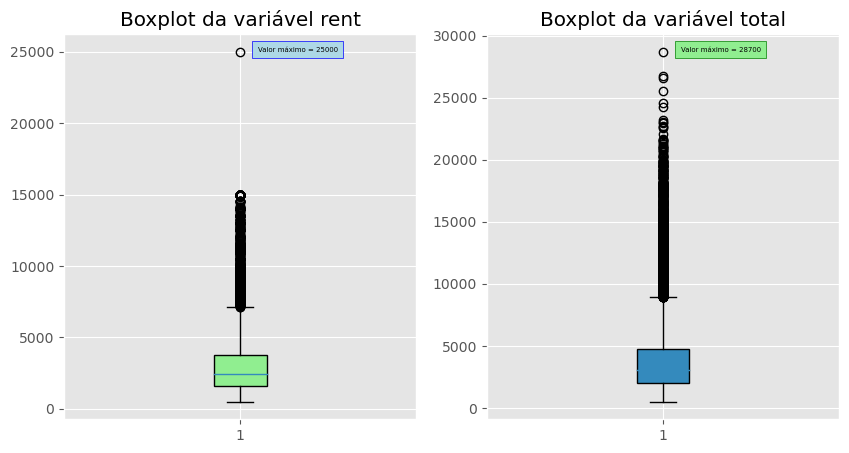

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10,5)) # Cria uma figura com 2 subplots

# Cria um boxplot para variável "rent" no primeiro subplot
bp1 = axs[0].boxplot(aptos["rent"], patch_artist=True)
axs[0].set_title("Boxplot da variável rent")

# Define a cor do boxplot
bp1["boxes"][0].set_facecolor("lightblue")

# Adiciona a legenda do valor máximo
max_rent = np.max(aptos["rent"])
axs[0].annotate(f"Valor máximo = {max_rent}",
               xy=(1, max_rent),
               xytext=(1.05, max_rent),
               bbox=dict(facecolor="lightblue", edgecolor="blue"),
               fontsize=5)

# Cria um boxplot para variável "total" no segundo subplot
bp2 = axs[1].boxplot(aptos["total"], patch_artist=True)
axs[1].set_title("Boxplot da variável total")

# Define a cor do boxplot
bp1["boxes"][0].set_facecolor("lightgreen")

# Adiciona a legenda do valor máximo
max_total = np.max(aptos["total"])
axs[1].annotate(f"Valor máximo = {max_total}",
               xy=(1, max_total),
               xytext=(1.05, max_total),
               bbox=dict(facecolor="lightgreen", edgecolor="green"), 
               fontsize=5)


# Mostra os gráficos
plt.show()

Temos diversos outliers, inclusive, embora a mediana esteja abaixo de 5 mil, vemos em destaque que o valor máximo de ambos chega na casa dos 20 mil - sendo que o valor total ultrapassa os 28 mil.

Abaixo podemos ver a distribuição da mediana no desenho de um histograma:

In [87]:
# Calculo a mediana de rent
rent_median = aptos.rent.median()

# Formatando a mediana no formato de "R$X.XX"
rent_median_format = (
    f"R${round(rent_median, 2)}"
    .replace(",", "v")
    .replace(".", ",")
    .replace("v", ".")
)

data = [go.Histogram(x=aptos.rent,
                    nbinsx=50,
                    marker=dict(color="blue"))]

line = [go.Scatter(x=[mediana_rent, mediana_rent],
                   y=[0,2200],
                   mode="lines",
                   line=dict(color="lightblue", dash="dash"),
                   showlegend=True,
                   name=f"Mediana = {rent_median_format}")]

fig = go.Figure(data=data+line)


fig.update_layout(title_text = "Histograma do Aluguel",
                  xaxis_title = "Aluguel",
                  yaxis_title = "Contagem",
                  autosize=False,
                  width=900,
                  height=500)

fig.update_yaxes(range=[0,2200])

fig.show()

Vamos fazer uma última verificação do aluguel e do valor do imóvel, olhando para as estatísticas descritivas:

In [78]:
aptos[["rent", "total"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11657.0,3250.814789,2650.711557,500.0,1590.0,2415.0,3800.0,25000.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


Vamos dar uma olhada nos tipos de imóveis!

In [86]:
cores_por_tipo = {"Studio e kitnet":"#440154","Apartamento":"#482878","Casa em condomínio":"#26828e","Casa":"#31688e"}

fig = px.histogram(aptos, x="type", color="type", color_discrete_map=cores_por_tipo)
fig.update_layout(title="Distribuição dos tipos de imóveis",
                  xaxis_title="Tipos de imóveis",
                  yaxis_title="Contagem")

fig.show()

Como esperado o número de apartamentos é muito superior as demais. Isso é esperado numa magalópole com São Paulo. Também é importante destacar que o número de casas em condomínio é baixíssimo. Sendo essas residências mais comuns nas classes mais altas, fica nítida a desigualdade existente na cidade, algo que pudemos ver com assímetria no histograma dos aluguéis.

Apesar de serem varáveis númericas, podemos plotar o número de quartos e vagas na garagem em gráficos de barras

In [108]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=aptos["bedrooms"].value_counts().index,
           y=aptos["bedrooms"].value_counts(),
           name="Bedrooms"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=aptos["garage"].value_counts().index,
           y=aptos["garage"].value_counts(),
           name="Garage"),
    row=1, col=2
)

fig.update_layout(title="Destribuição de Quartos e Garagens")

fig.update_xaxes(tickmode="linear")


fig.show()

Para variável área, vamos explorar algumas estatísticas adicionais:

In [111]:
from tabulate import tabulate

desc = aptos["area"].describe()
desc["var"] = aptos["area"].var()
desc["kurt"] = aptos["area"].kurtosis()
desc = pd.DataFrame(desc)
print(tabulate(desc, headers="keys", tablefmt="psql", showindex=True))

+-------+------------+
|       |       area |
|-------+------------|
| count | 11657      |
| mean  |    84.6557 |
| std   |    74.0205 |
| min   |     0      |
| 25%   |    40      |
| 50%   |    60      |
| 75%   |    96      |
| max   |   580      |
| var   |  5479.04   |
| kurt  |     8.3946 |
+-------+------------+


Com base nas estatísticas geradas, é possível observar que o <b>tamanho médio da área dos apartamentos em São Paulo é de aproximadamente 84.66 metros quadrados. No entanto, o desvio padrão é bastante alto (74.02 metros quadrados)</b>, indicando uma grande variação nos tamanhos dos apartamentos.

Podemos notar que há alguma anomalia nos dados, já que temos um apartamento de 0 metros quadrados, algo impossível de acontecer. Isso já liga uma alerta para investigar se os dados estão corretos ou se tivemos algum problema nos inputs.

Podemos ver também que a mediana é de 60 metros quadrados, o que é menor que á média, sugerindo que a distribuição dos tamanhos dos apartamentos é inclinada para direita. Isso é indicado pelo valor alto de curtose (8,3946), que indica a presença de outliers no lado direito da distribuição.

Além disso, a diferença entre os valores dos quartis superior e inferior (96 - 40 = 56 metros quadrados) sugere que a maior parte dos apartamentos tem áreas entre 40 a 96 metros quadrados.

Em suma, embora a maioria dos apartamentos pareça ter entre 40 e 96 metros quadrados, há uma quantidade significativa de apartamentos que são muito menores ou muito maiores do que isso, e isso é provável que seja o resultado da presença de outliers.

In [115]:
print(f"Temos {aptos.query('area < 10').shape[0]} com menos de 10 metros quadrados.")

Temos 7 com menos de 10 metros quadrados.


In [116]:
aptos.query('area < 10')

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


Parece que há algo estranho nesses valores, poderia ser o caso da área de algumas observações estarem em diferentes unidades de medida, mas isso não explicaria os imóveis de 0 metros. Olhando os preços de aluguel, alguns estão até acima da média e da mediana. Normalmente, poderíamos acionar alguém que mexesse com as bases da empresa, ou um engenheiro de dados, ou um DBA, ou até mesmo nós, cientistas/analistas, poderíamos investigar. Aqui, não existe esta possibilidade. Sendo assim, a opção será excluir essas observações para não trazer muita sujeira para a análise, embora já seja esperado que a gente tenha problemas de qualidade dos dados.

In [118]:
aptos = aptos.query('area >= 10')

Vamos gerar uma descritiva final para esse novo dataset:

In [119]:
aptos.describe().T

,count,mean,std,min,25%,50%,75%,max
area,11650.0,84.705408,74.014919,10.0,40.00,60.0,96.00,580.0
bedrooms,11650.0,1.966266,0.931223,0.0,1.00,2.0,3.00,6.0
garage,11650.0,1.060258,1.132394,0.0,0.00,1.0,2.00,6.0
rent,11650.0,3251.095107,2650.771522,500.0,1590.00,2415.0,3800.00,25000.0
total,11650.0,4080.398627,3352.415415,509.0,1996.25,3057.0,4774.75,28700.0


In [120]:
aptos.describe(include=["O"]).T

,count,unique,top,freq
address,11650,5344,Rua da Consolação,49
district,11650,1199,Bela Vista,352
type,11650,4,Apartamento,7193
